In [3]:
import tensorflow as tf
tf.compat.v1.set_random_seed(1)
import numpy as np
tf.__version__

'2.0.0-beta0'

In [4]:
class Model(object):
  def __init__(self):
    # Initialize variable to (5.0, 0.0)
    # In practice, these should be initialized to random values.
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)
    
  def __call__(self, x):
    return self.W * x + self.b
  
model = Model()

assert model(3.0).numpy() == 15.0



In [5]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))


In [8]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise # 3 x + 2 + noise()

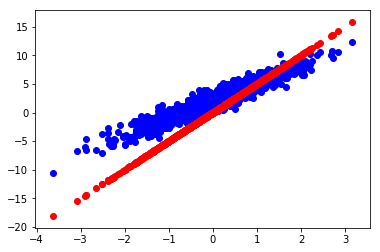

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()


In [10]:
print('Current loss: '),
print(loss(model(inputs), outputs).numpy())
current_loss = loss(model(inputs), outputs)

Current loss: 
9.472986


In [19]:
trainable_variables = [model.W, model.b]
with tf.GradientTape() as tape:
    current_loss = loss(model(inputs), outputs)
gradients = tape.gradient(current_loss, trainable_variables) 
print(gradients)


[<tf.Tensor: id=8574, shape=(), dtype=float32, numpy=0.010382684>, <tf.Tensor: id=8567, shape=(), dtype=float32, numpy=-0.0016168058>]


In [25]:

def train2(model, inputs, outputs, learning_rate):
    trainable_variables = [model.W, model.b]
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, 
                                         epsilon=1e-9)
    gradients = t.gradient(current_loss,  trainable_variables)    
    optimizer.apply_gradients(zip(gradients, trainable_variables))
    
#-----------------------------------------------------------------------------------------------

optimizer_global = tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.98, 
                                         epsilon=1e-9)
def train(model, inputs, outputs, learning_rate):
    trainable_variables = [model.W, model.b]
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    
    gradients = t.gradient(current_loss,  trainable_variables)    
    optimizer_global.apply_gradients(zip(gradients, trainable_variables))



Epoch  0: W=5.00 b=0.00, loss=9.47299
Epoch  1: W=4.90 b=0.10, loss=8.65627
Epoch  2: W=4.80 b=0.20, loss=7.88202
Epoch  3: W=4.70 b=0.30, loss=7.15082
Epoch  4: W=4.60 b=0.40, loss=6.46311
Epoch  5: W=4.50 b=0.50, loss=5.81925
Epoch  6: W=4.40 b=0.60, loss=5.21942
Epoch  7: W=4.31 b=0.69, loss=4.66368
Epoch  8: W=4.21 b=0.79, loss=4.15189
Epoch  9: W=4.12 b=0.89, loss=3.68375
Epoch 10: W=4.02 b=0.98, loss=3.25875
Epoch 11: W=3.93 b=1.07, loss=2.87617
Epoch 12: W=3.84 b=1.16, loss=2.53505
Epoch 13: W=3.75 b=1.25, loss=2.23421
Epoch 14: W=3.66 b=1.34, loss=1.97221
Epoch 15: W=3.58 b=1.43, loss=1.74736
Epoch 16: W=3.50 b=1.51, loss=1.55774
Epoch 17: W=3.42 b=1.59, loss=1.40114
Epoch 18: W=3.34 b=1.67, loss=1.27517
Epoch 19: W=3.27 b=1.74, loss=1.17721
Epoch 20: W=3.20 b=1.81, loss=1.10444
Epoch 21: W=3.14 b=1.88, loss=1.05394
Epoch 22: W=3.08 b=1.94, loss=1.02266
Epoch 23: W=3.02 b=2.00, loss=1.00754
Epoch 24: W=2.97 b=2.05, loss=1.00553
Epoch 25: W=2.92 b=2.10, loss=1.01367
Epoch 26: W=

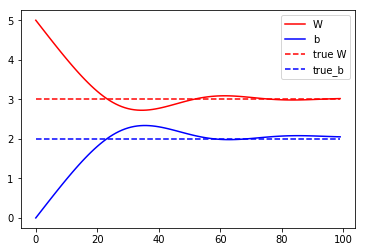

In [26]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(100)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()
  

Epoch  0: W=5.00 b=0.00, loss=9.47299
Epoch  1: W=4.90 b=0.10, loss=8.65627
Epoch  2: W=4.80 b=0.20, loss=7.88097
Epoch  3: W=4.70 b=0.30, loss=7.14708
Epoch  4: W=4.60 b=0.40, loss=6.45460
Epoch  5: W=4.50 b=0.50, loss=5.80353
Epoch  6: W=4.40 b=0.60, loss=5.19388
Epoch  7: W=4.30 b=0.70, loss=4.62563
Epoch  8: W=4.20 b=0.80, loss=4.09880
Epoch  9: W=4.10 b=0.90, loss=3.61339
Epoch 10: W=4.00 b=1.00, loss=3.16938
Epoch 11: W=3.90 b=1.10, loss=2.76679
Epoch 12: W=3.80 b=1.20, loss=2.40561
Epoch 13: W=3.70 b=1.30, loss=2.08584
Epoch 14: W=3.60 b=1.40, loss=1.80749
Epoch 15: W=3.50 b=1.50, loss=1.57054
Epoch 16: W=3.40 b=1.60, loss=1.37501
Epoch 17: W=3.30 b=1.70, loss=1.22089
Epoch 18: W=3.20 b=1.80, loss=1.10819
Epoch 19: W=3.10 b=1.90, loss=1.03689
Epoch 20: W=3.00 b=2.00, loss=1.00701
Epoch 21: W=3.10 b=2.10, loss=1.01405
Epoch 22: W=3.00 b=2.00, loss=1.00701
Epoch 23: W=3.10 b=2.10, loss=1.01405
Epoch 24: W=3.00 b=2.00, loss=1.00701
Epoch 25: W=3.10 b=2.10, loss=1.01405
Epoch 26: W=

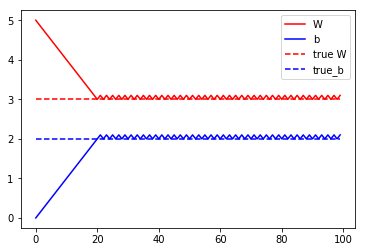

In [27]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(100)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train2(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()
  